In [3]:
from stable_diffusion_reference_only.pipelines.stable_diffusion_reference_only_pipeline import (
    StableDiffusionReferenceOnlyPipeline,
)
from diffusers.schedulers import UniPCMultistepScheduler
from PIL import Image
import os

In [4]:
pipe = StableDiffusionReferenceOnlyPipeline.from_pretrained(
    "AisingioroHao0/stable-diffusion-reference-only-automatic-coloring-0.1.2"
).to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

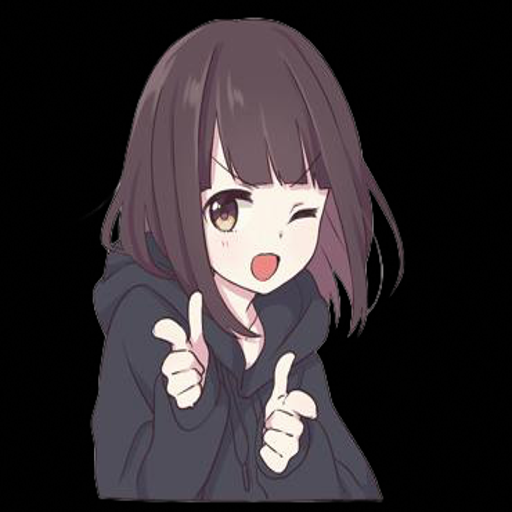

In [7]:
prompt = (
    Image.open("../validation_images/3/1_capture.png").convert("RGB").resize((512, 512))
)
prompt

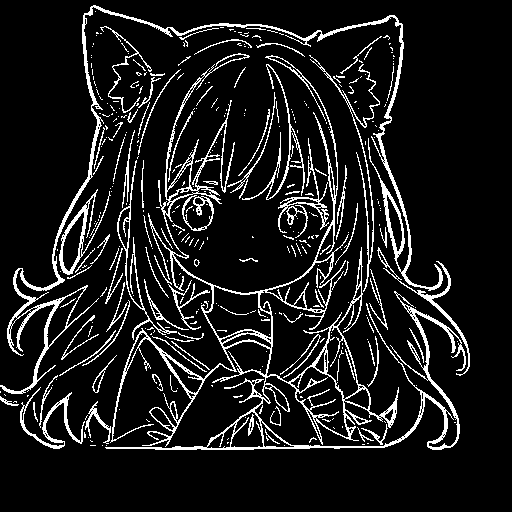

In [9]:
blueprint = Image.open("../validation_images/9/2_line.png").convert("RGB").resize((512, 512))
blueprint = Image.eval(blueprint, lambda x: 255 - x)
blueprint

  0%|          | 0/20 [00:00<?, ?it/s]

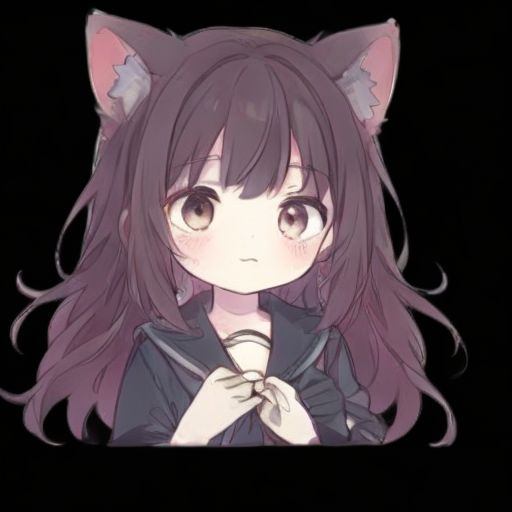

In [10]:
result = pipe(
    prompt=prompt, blueprint=blueprint, num_inference_steps=20
).images[0]
result

In [ ]:
new_result=Image.new("RGB",(512*3,512))
new_result.paste(prompt,(0,0))
new_result.paste(blueprint,(512,0))
new_result.paste(result,(1024,0))
new_result.save(os.path.join("../lab_logs","12.png"))
new_result